# Calculating assembly histories for populations of halos


- adapted by SDC from https://github.com/ArgonneCPAC/diffmah/blob/main/docs/source/diffmah_halo_populations.ipynb
- work at CCIN2P3 on K80 GPU
- conda environnment : conda_jax0325
- creation  2023/09/26
- last update  2023/11/10


    pip install --upgrade  "jax[cuda11_cudnn82]"=='0.3.25' "jaxlib"=='0.3.25' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
    python -m pip install "jax[cuda11_cudnn82]"  "jaxlib[cuda11_cudnn82]"



   
    
| computer | processor | kernel              |    date     |
| --- | --- | --- | --- |
| CC       | CPU       | conda_jax0325_py310 | 2023-11-10  |



libraries at CC
===============

- jaxlib-0.3.25+cuda11.cudnn82
- jaxopt
- optax
- corner
- arviz
- numpyro




(conda_jax0325_py310) 
`/pbs/throng/lsst/users/dagoret/desc/StellarPopulationSynthesis>pip list | grep` 

| lib | version |
|--- | --- | 
|jax  |                         0.4.20 |
|jaxlib |                       0.4.20 |
ïjaxopt  |                      0.8.2 |    


Starting from a collection of best-fitting approximations to halo merger trees, you can use the `calc_halo_history` function to compute the assembly history for every halo in the sample. Here we'll just demonstrate a few simple cases.

Note that in these examples, we pass in arbitrary values for the early- and late-time indices. However, for real halos (and also for the results returned by the diffmah-provided MAH fitting script), $0 < \alpha_{\rm late} < \alpha_{\rm early}.$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-11-10 10:13:07.744965: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:497] The NVIDIA driver's CUDA version is 11.3 which is older than the ptxas CUDA version (11.4.152). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


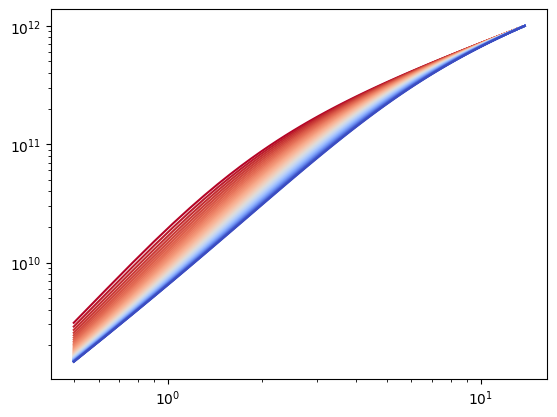

In [2]:
from diffmah import calc_halo_history
import matplotlib.cm as cm


n_halos, n_times = 50, 100
tarr = np.linspace(0.5, 13.8, n_times)
tauc = np.linspace(1, 5, n_halos)
logmp = 12
early, late = 2, 1
dmhdt, log_mah = calc_halo_history(tarr, tarr[-1], logmp, tauc, early, late)
colors=cm.coolwarm(np.linspace(1,0,n_halos))

fig, ax = plt.subplots(1, 1)
__=ax.loglog()
for ih in range(n_halos):
    __=ax.plot(tarr, 10**log_mah[ih, :], color=colors[ih])


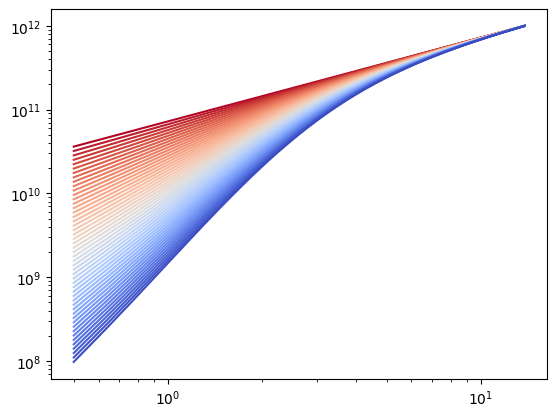

In [3]:
from diffmah import calc_halo_history
import matplotlib.cm as cm


n_halos, n_times = 50, 100
tarr = np.linspace(0.5, 13.8, n_times)
tauc = 2.0
logmp = 12
early = np.linspace(1, 3, n_halos)
late = 1
dmhdt, log_mah = calc_halo_history(tarr, tarr[-1], logmp, tauc, early, late)
colors=cm.coolwarm(np.linspace(1,0,n_halos))

fig, ax = plt.subplots(1, 1)
__=ax.loglog()
for ih in range(n_halos):
    __=ax.plot(tarr, 10**log_mah[ih, :], color=colors[ih])


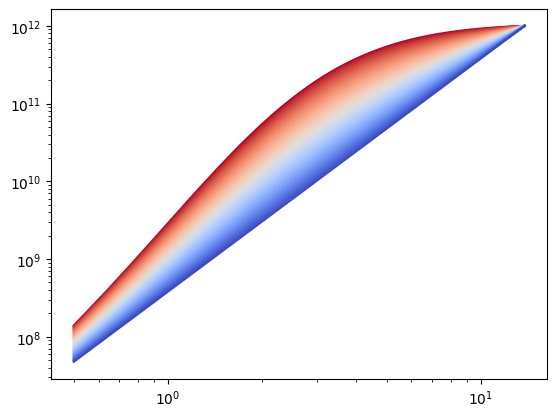

In [4]:
from diffmah import calc_halo_history
import matplotlib.cm as cm


n_halos, n_times = 50, 100
tarr = np.linspace(0.5, 13.8, n_times)
tauc = 2.0
logmp = 12
early = 3
late = np.linspace(0.01, 3, n_halos)
dmhdt, log_mah = calc_halo_history(tarr, tarr[-1], logmp, tauc, early, late)
colors=cm.coolwarm(np.linspace(1,0,n_halos))

fig, ax = plt.subplots(1, 1)
__=ax.loglog()
for ih in range(n_halos):
    __=ax.plot(tarr, 10**log_mah[ih, :], color=colors[ih])


## Generating Monte Carlo realizations of halo MAHs

2023-11-10 10:13:15.515523: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gemm_algorithm_picker.cc:219] Failed to find best cuBLAS algorithm, GEMM performance might be suboptimal: INTERNAL: All algorithms tried for %cublas-batch-gemm.1 = f32[5000,3,3]{2,1,0} custom-call(f32[5000,3,3]{2,1,0} %multiply.266, f32[5000,3,3]{2,1,0} %multiply.266), custom_call_target="__cublas$gemm", metadata={op_name="jit(_mc_halo_mahs)/jit(main)/jit(_get_mah_means_and_covs)/jit(_get_covs_late)/jit(_get_cov_scalar)/dot_general[dimension_numbers=(((2,), (1,)), ((0,), (0,))) precision=None preferred_element_type=None]" source_file="/tmp/ipykernel_4020/2929518550.py" source_line=8}, backend_config="{\"alpha_real\":1,\"alpha_imag\":0,\"beta\":0,\"dot_dimension_numbers\":{\"lhs_contracting_dimensions\":[\"2\"],\"rhs_contracting_dimensions\":[\"2\"],\"lhs_batch_dimensions\":[\"0\"],\"rhs_batch_dimensions\":[\"0\"]},\"precision_config\":{\"operand_precision\":[\"DEFAULT\",\"DEFAULT\"]},\"epilogue\":

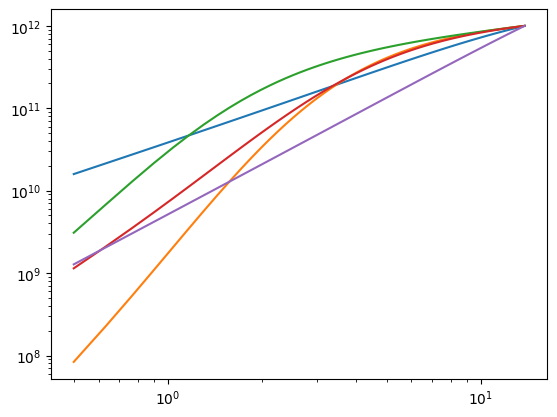

In [5]:
from diffmah import mc_halo_population

cosmic_time = np.linspace(0.5, 13.8, 100)

n_halos = 5_000
logmh = np.zeros(n_halos) + 12

_res = mc_halo_population(cosmic_time, cosmic_time[-1], logmh)
dmhdt, log_mah, early, late, lgtc, mah_type_arr = _res

fig, ax = plt.subplots(1, 1)
__=ax.loglog()
for ih in range(5):
    __=ax.plot(tarr, 10**log_mah[ih, :])
